In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('creditcard.csv') 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape)

(284807, 31)


## Statistiques descriptives

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

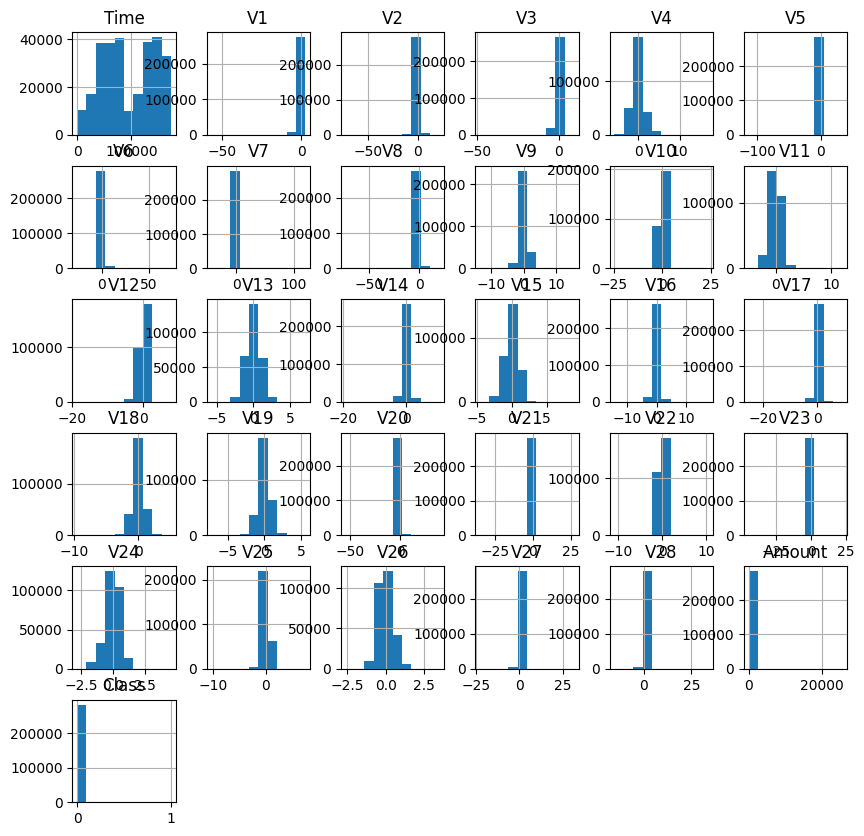

C:\Users\hicha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 284807.
  res = hypotest_fun_out(*samples, **kwds)


The variable 'Time' does not follow a normal distribution.
The variable 'V1' does not follow a normal distribution.
The variable 'V2' does not follow a normal distribution.
The variable 'V3' does not follow a normal distribution.
The variable 'V4' does not follow a normal distribution.
The variable 'V5' does not follow a normal distribution.
The variable 'V6' does not follow a normal distribution.
The variable 'V7' does not follow a normal distribution.
The variable 'V8' does not follow a normal distribution.
The variable 'V9' does not follow a normal distribution.
The variable 'V10' does not follow a normal distribution.
The variable 'V11' does not follow a normal distribution.
The variable 'V12' does not follow a normal distribution.
The variable 'V13' does not follow a normal distribution.
The variable 'V14' does not follow a normal distribution.
The variable 'V15' does not follow a normal distribution.
The variable 'V16' does not follow a normal distribution.
The variable 'V17' doe

In [6]:
from scipy.stats import shapiro

# Statistiques descriptives
descriptive_stats = data.describe()
print(descriptive_stats)

# Visualisation graphique
data.hist(figsize=(10, 10))
plt.show()

for column in data.columns:
    if column != 'Class':  # Exclude the target variable 'Class'
        _, p_value = shapiro(data[column])
        if p_value < 0.05:
            print(f"The variable '{column}' does not follow a normal distribution.")
        else:
            print(f"The variable '{column}' follows a normal distribution.")


## Analyse Bivariée


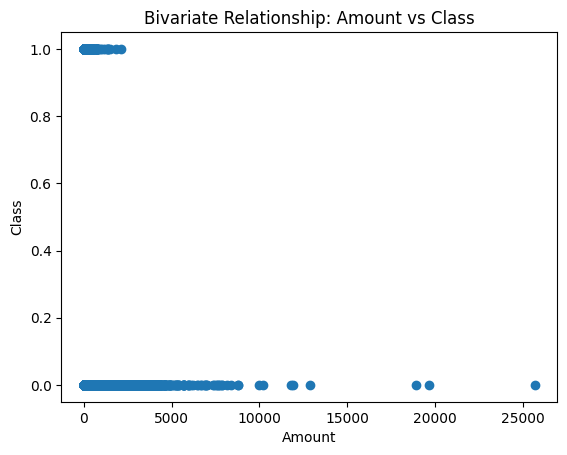

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Amount'], data['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Bivariate Relationship: Amount vs Class')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

group1 = data[data['Class'] == 1]['Amount']
group0 = data[data['Class'] == 0]['Amount']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group0)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 3.00555231397141
P-value: 0.002651220649191683


## Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (227845, 30) (227845,)
Testing set shape: (56962, 30) (56962,)


## Over-sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Apply over-sampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("X_train_resampled:", X_train_resampled.shape,"y_train_resampled:", y_train.shape)

X_train_resampled: (454902, 30) y_train_resampled: (227845,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## LogisticRegression

C:\Users\hicha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matrice de confusion :
[[55031  1833]
 [    7    91]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Score d'exactitude :
0.9676977634212282


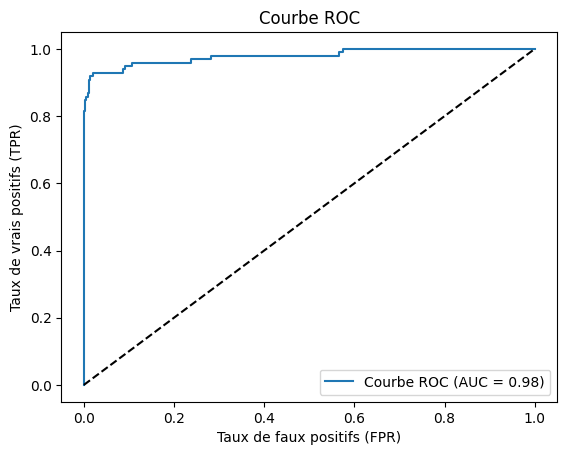

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

# Créer une instance du modèle LogisticRegression
logreg = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train_resampled, y_train_resampled)

# Tester le modèle sur les données de test
y_pred = logreg.predict(X_test)

# Évaluer les performances du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nScore d'exactitude :")
print(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
# Obtenir les probabilités de prédiction pour chaque classe
probas = logreg.predict_proba(X_test)
probas = probas[:, 1]  # Utilisez les probabilités de la classe positive

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
fpr, tpr, seuils = roc_curve(y_test, probas)

# Calculer l'aire sous la courbe ROC (AUC)
auc_score = auc(fpr, tpr)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Ligne en pointillés pour la référence aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()




## DecisionTreeClassifier

Matrice de confusion :
[[56839    25]
 [   28    70]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.71      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Score d'exactitude :
0.9990695551420246


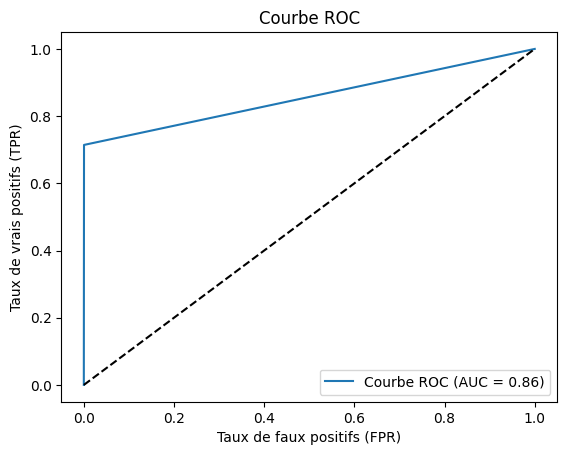

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Créer une instance du modèle LogisticRegression
logreg = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train_resampled, y_train_resampled)

# Tester le modèle sur les données de test
y_pred = logreg.predict(X_test)

# Évaluer les performances du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nScore d'exactitude :")
print(accuracy_score(y_test, y_pred))

probas = logreg.predict_proba(X_test)
probas = probas[:, 1]  # Utilisez les probabilités de la classe positive

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
fpr, tpr, seuils = roc_curve(y_test, probas)

# Calculer l'aire sous la courbe ROC (AUC)
auc_score = auc(fpr, tpr)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Ligne en pointillés pour la référence aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


## RandomForestClassifier

Matrice de confusion :
[[56862     2]
 [   21    77]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Score d'exactitude :
0.9995962220427653


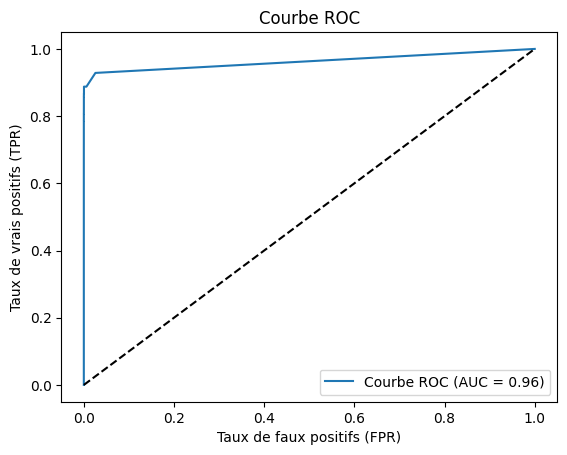

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Créer une instance du modèle LogisticRegression
logreg = RandomForestClassifier()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train_resampled, y_train_resampled)

# Tester le modèle sur les données de test
y_pred = logreg.predict(X_test)

# Évaluer les performances du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nScore d'exactitude :")
print(accuracy_score(y_test, y_pred))

probas = logreg.predict_proba(X_test)
probas = probas[:, 1]  # Utilisez les probabilités de la classe positive

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
fpr, tpr, seuils = roc_curve(y_test, probas)

# Calculer l'aire sous la courbe ROC (AUC)
auc_score = auc(fpr, tpr)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Ligne en pointillés pour la référence aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


## KNeighborsClassifier

Matrice de confusion :
[[56784    80]
 [   79    19]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.19      0.19      0.19        98

    accuracy                           1.00     56962
   macro avg       0.60      0.60      0.60     56962
weighted avg       1.00      1.00      1.00     56962


Score d'exactitude :
0.9972086654260736


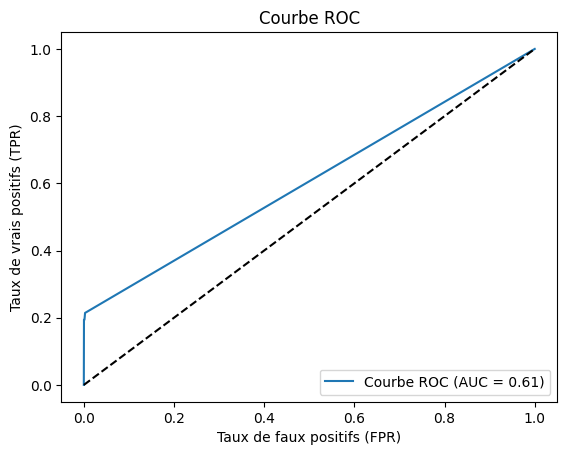

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Créer une instance du modèle LogisticRegression
logreg = KNeighborsClassifier()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train_resampled, y_train_resampled)

# Tester le modèle sur les données de test
y_pred = logreg.predict(X_test)

# Évaluer les performances du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nScore d'exactitude :")
print(accuracy_score(y_test, y_pred))

probas = logreg.predict_proba(X_test)
probas = probas[:, 1]  # Utilisez les probabilités de la classe positive

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
fpr, tpr, seuils = roc_curve(y_test, probas)

# Calculer l'aire sous la courbe ROC (AUC)
auc_score = auc(fpr, tpr)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Ligne en pointillés pour la référence aléatoire
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()
